# ml lab2

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

pd.set_option('display.max_rows', 10)

### 1. read ex1 data

In [296]:
data1 = pd.DataFrame(np.genfromtxt('data/ex2data1.txt', delimiter=','), columns=['Grade1', 'Grade2', 'Accepted'])
data1

,Grade1,Grade2,Accepted
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
...,...,...,...
95,83.489163,48.380286,1.0
96,42.261701,87.103851,1.0
97,99.315009,68.775409,1.0
98,55.340018,64.931938,1.0


### 2. plot data

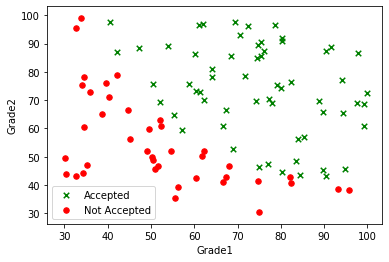

In [297]:
def get_plot(data, x_label = 'Grade1', y_label = 'Grade2'):
    plt.figure()
    ax = data.loc[data.Accepted == 1].plot(x=x_label, y=y_label, style=['gx'], label='Accepted')
    ay = data.loc[data.Accepted == 0].plot(x=x_label, y=y_label, style=['rx'], label='Not Accepted', ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.legend()
    return plt, ax

def plot_data(data, label_x='Grade1', label_y='Grade2', axes=None):
    pos = data.loc[data.Accepted == 1]
    neg = data.loc[data.Accepted == 0]
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(pos[label_x], pos[label_y], marker='x', c='g', s=30, label='Accepted')
    axes.scatter(neg[label_x], neg[label_y], c='r', s=30, label='Not Accepted')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

plot_data(data1)

### 3. cost function J(θ) + gradient descent

In [298]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(X @ theta)
    J = (-1 / m) * ((y.T @ np.log(h)) + ((1 - y).T @ np.log(1 - h)))
    error = h - y
    gd = (1 / m) * (X.T @ error)
    return J, gd

In [299]:
m, n = data1.shape
initial_theta = np.zeros(n)

X = data1[['Grade1', 'Grade2']]
X.insert(0, 'theta_0', 1)
y = data1['Accepted']

cost, gd = cost_function(initial_theta, X, y)
print(f'Cost with initial_theta:\t{cost}')
print(f'Gradient with initial_theta:\t{gd.ravel()}')

Cost with initial_theta:	0.6931471805599452
Gradient with initial_theta:	[ -0.1        -12.00921659 -11.26284221]


### 4. optimize cost

In [300]:
def optimize_cost(theta, X, y):
    cost, _ = cost_function(theta, X, y)
    return cost

def optimize_gradient(theta, X, y):
    _, gd = cost_function(theta, X, y)
    return gd

def optimize(func, gradient, X, y, method):
    initial_theta = np.zeros(n)
    
    result = opt.minimize(fun=func, x0=initial_theta, args=(X, y), method=method, jac=gradient)
    theta = result.x
    cost = func(theta, X, y)
    
    print(f'theta:\t{theta.ravel()}\ncost:\t{cost}')
    return result

#### Nelder-Mead

In [301]:
result = optimize(optimize_cost, optimize_gradient, X, y, 'Nelder-Mead')
result

theta:	[-25.16130062   0.20623142   0.20147143]
cost:	0.2034977015902151


 final_simplex: (array([[-25.16130062,   0.20623142,   0.20147143],
       [-25.16135807,   0.20623176,   0.20147199],
       [-25.1613519 ,   0.20623203,   0.20147171],
       [-25.16137971,   0.20623202,   0.20147188]]), array([0.2034977, 0.2034977, 0.2034977, 0.2034977]))
           fun: 0.2034977015902151
       message: 'Optimization terminated successfully.'
          nfev: 287
           nit: 157
        status: 0
       success: True
             x: array([-25.16130062,   0.20623142,   0.20147143])

#### Broyden-Fletcher-Goldfarb-Shanno

In [302]:
result = optimize(optimize_cost, optimize_gradient, X, y, 'BFGS')
result

theta:	[-25.16133284   0.2062317    0.2014716 ]
cost:	0.20349770158944375


/Users/drapegnik/.pyenv/versions/3.7.4/envs/bsuir/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


      fun: 0.20349770158944375
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: theta_0   -9.524768e-09
Grade1    -9.319213e-07
Grade2    -2.826089e-07
dtype: float64
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

### 5. predict function

In [303]:
def predict(theta, X):
    predict = sigmoid(np.dot(X, theta))
    return predict > 0.5

theta = result.x
sample = np.array([1, 57, 79])
probability = sigmoid(sample @ theta)
print(f'With Grades {sample[1:]}, probability of acceptance is: {probability}')

With Grades [57 79], probability of acceptance is: 0.924848961903417


In [304]:
def get_accuracy(theta, X, y):
    p = predict(theta, X)
    return y[p == y].size / y.size * 100
print(f'Train Accuracy: {get_accuracy(theta, X, y)}%')

Train Accuracy: 89.0%


### 6. decision surface

<Figure size 432x288 with 0 Axes>

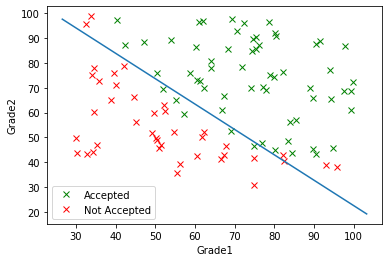

In [305]:
plot, ax = get_plot(data1)
slope = -(theta[1] / theta[2])
intercept = -(theta[0] / theta[2])

xs = np.array(ax.get_xlim())
ys = intercept + (slope * xs)

plot.plot(xs, ys);
plot.show()

### 7. read ex2 data

In [306]:
data2 = pd.DataFrame(np.genfromtxt('data/ex2data2.txt', delimiter=','), columns=['Test1', 'Test2', 'Accepted'])
data2

,Test1,Test2,Accepted
0,0.051267,0.699560,1.0
1,-0.092742,0.684940,1.0
2,-0.213710,0.692250,1.0
3,-0.375000,0.502190,1.0
4,-0.513250,0.465640,1.0
...,...,...,...
113,-0.720620,0.538740,0.0
114,-0.593890,0.494880,0.0
115,-0.484450,0.999270,0.0
116,-0.006336,0.999270,0.0


### 8. plot data

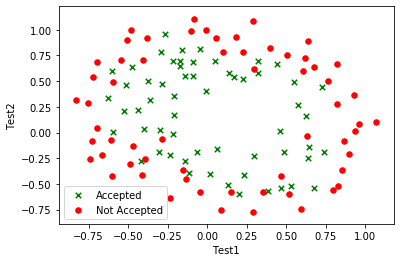

In [307]:
plot_data(data2, 'Test1', 'Test2')

### 9. map features

In [308]:
def map_feature(x1, x2, degree=6):
    '''
    Maps the two input features to quadratic features.
    Returns features array:
        x1, x2, x1**2, x2**2, x1*x2, x1*x2**2...
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    result = np.ones(shape=(x1[:, 0].size, 1))
    m, n = result.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            result = np.append(result, r, axis=1)

    return result

x1 = np.array(data2['Test1'])
x2 = np.array(data2['Test2'])
mapped = map_feature(x1, x2)
mapped.shape

(118, 28)

### 10. l2 regularization with gradient descent

In [309]:
def cost_function_reg(theta, X, y, l=1):
    h = sigmoid(X.dot(theta))
    thetaR = theta[1:, 0]

    J = (-1.0 / m) * ((y.T @ np.log(h)) + ((1 - y.T) @ np.log(1.0 - h))) + (l / (2.0 * m)) * (thetaR.T @ thetaR)

    y.shape = h.shape
    delta = h - y
    sumdelta = delta.T @ X[:, 1]
    grad1 = (1.0 / m) * sumdelta

    XR = X[:, 1:X.shape[1]]
    sumdelta = delta.T @ XR

    grad = (1.0 / m) * (sumdelta + l * thetaR)

    out = np.zeros(shape=(grad.shape[0], grad.shape[1] + 1))

    out[:, 0] = grad1
    out[:, 1:] = grad

    return J.flatten(), out.T.flatten()

def gradient_reg(theta, X, y, l=1, alpha=0.2, num_iters=400):
    m = y.size
    j_history = []
    for i in range(0, num_iters):
        cost, grad = cost_function_reg(theta, X, y, l)
        grad.shape = theta.shape
        theta -= alpha * grad
        j_history.append(cost)

    return theta, j_history

In [310]:
m, n = data2.shape

y = np.array(data2['Accepted'])
y.shape = (m, 1)
initial_theta = np.zeros(shape=(mapped.shape[1], 1))

cost, _ = cost_function_reg(initial_theta, mapped, y)
print(f'Initial Cost:\t{cost}')

gd_theta, _ = gradient_reg(initial_theta, mapped, y)

Initial Cost:	[0.69314718]


### 11. other regularization functions

In [311]:
def reshape_decorator(return_type):
    def reshape_theta(theta, X, y):
        theta.shape = (mapped.shape[1], 1)
        cost, grad = cost_function_reg(theta, X, y)
        theta.shape = (mapped.shape[1],)
        return cost if return_type == 'cost' else grad
    return reshape_theta

result = opt.minimize(
    fun=reshape_decorator('cost'),
    x0=initial_theta,
    args=(mapped, y),
    method='BFGS',
    jac=reshape_decorator('gd')
)
bfgs_theta = result.x
bfgs_theta.shape = (mapped.shape[1], 1)

### 12. predict function

In [313]:
print(f'GD Train Accuracy: {get_accuracy(gd_theta, mapped, y)}%')
print(f'BFGS Train Accuracy: {get_accuracy(bfgs_theta, mapped, y)}%')

GD Train Accuracy: 80.50847457627118%
BFGS Train Accuracy: 82.20338983050848%


### 13-14. decision surface + different  λ

In [328]:
def get_contour(theta):
    u = np.linspace(-1, 1.5)
    v = np.linspace(-1, 1.5)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = map_feature(np.array(u[i]), np.array(v[j])).dot(np.array(theta))
    return u, v, z.T

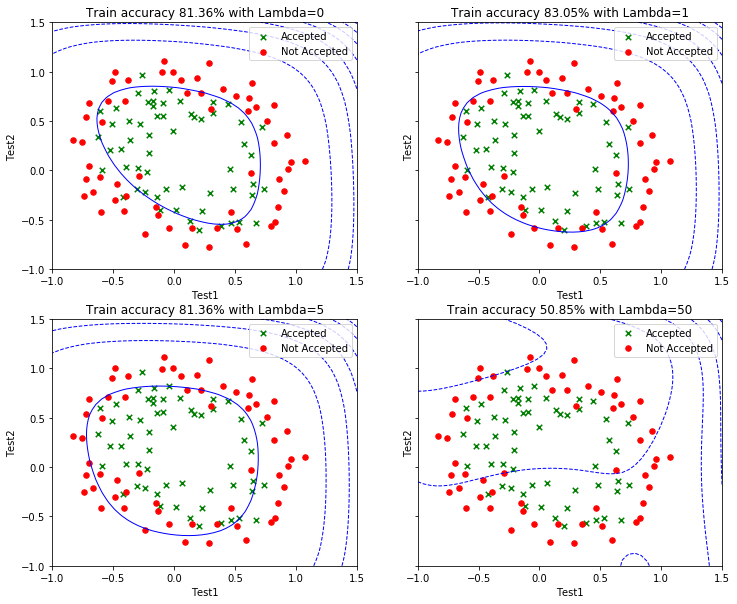

In [329]:
LAMBDAS = [0, 1, 5, 50]
fig, axes = plt.subplots(2, 2, sharey = True, figsize=(12, 10))

for i, reg_lambda in enumerate(LAMBDAS):
    initial_theta = np.zeros(shape=(mapped.shape[1], 1))
    theta, _ = gradient_reg(initial_theta, mapped, y, reg_lambda, 0.2, 1000)    
    accuracy = np.round(get_accuracy(theta, mapped, y), decimals=2)

    plot_data(data2, 'Test1', 'Test2', axes.flatten()[i])
    u, v, z = get_contour(theta)
     
    axes.flatten()[i].contour(u, v, z, colors='b', linewidths=1);       
    axes.flatten()[i].set_title(f'Train accuracy {accuracy}% with Lambda={reg_lambda}')

### 15. read ex3 data

In [330]:
import scipy.io

data3 = scipy.io.loadmat('data/ex2data3.mat')
x = np.array(data3['X'])
y = np.squeeze(data3['y'])
np.place(y, y == 10, 0)
n = x.shape[1]
m = x.shape[0]
labels_count = 10

### 16. visualize data

In [353]:
import matplotlib.image as mpimg

X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1, 20).T, cmap='binary')
plt.axis('off');

### 17-18. vectorizing logistic regression + L2

### 19. one-vs-all classification

In [354]:
classifiers = np.zeros(shape=(labels_count, n + 1))
for i in range(0, labels_count):
    label = (y == i).astype(int)
    initial_theta = np.zeros(shape=(X.shape[1], 1))
    theta, costs = gradient_reg(initial_theta, X, label, 0.4, 2.8, 10000)
    classifiers[i, :] = np.squeeze(theta)

### 20. predict function

In [356]:
def predict_class(input, classifiers):
    class_probs = sigmoid(input @ classifiers.transpose())
    if len(class_probs.shape) == 1:
        class_probs.shape = (1, class_probs.shape[0])
    predictions = class_probs.argmax(axis=1)
    return predictions

### 21. training accuracy

In [358]:
predictions = predict_class(X, classifiers)
accuracy = 100 * np.mean(predictions == y)
print(f'Training accuracy: {accuracy}')

Training accuracy: 94.74000000000001


### 22. conclusion

В данной лабораторной работе рассмотрена модель логистической регрессии.
Реализована `L2`-регуляризация, реализован бинарный классификатор с помощью логистической регрессии, который использовался для реализации многоклассового классификатора по методу "один против всех".

В пункте #14 показана зависимость результатов от параметра регуляризации `λ`: переобучение или недообучение выборки.